# UJIAN TENGAH SEMESTER - KECERDASAN BUATAN

## Mengimpor Library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Konfigurasi visualisasi

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Memuat Dataset dan Preview Dataset

In [2]:
df_airbnb = pd.read_csv("./airbnb.csv")

df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Eksplorasi Data Awal

### Struktur Umum Dataset

In [3]:
# Info kolom dan tipe data
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Jumlah Baris dan Kolom

In [4]:
# Dimensi dataset
print("\nJumlah baris:", df_airbnb.shape[0])
print("Jumlah kolom:", df_airbnb.shape[1])


Jumlah baris: 48895
Jumlah kolom: 16


### Statistik Deskriptif Awal

In [5]:
# Statistik deskriptif
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Median (karena describe tidak menyertakan median)
df_airbnb.median(numeric_only=True)

id                                1.967728e+07
host_id                           3.079382e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
reviews_per_month                 7.200000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
dtype: float64

### Missing Values

In [7]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Cleaning & Manipulasi

### Data Cleaning & Manipulasi

In [8]:
# Konversi kolom tanggal terlebih dahulu
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], errors='coerce')

# Hapus baris dengan nama listing kosong (jumlahnya hanya 16)
df_airbnb = df_airbnb.dropna(subset=['name'])

# Isi missing 'host_name' dengan 'Unknown'
df_airbnb['host_name'] = df_airbnb['host_name'].fillna('Unknown')

# Isi 'reviews_per_month' yang kosong dengan 0 (listing belum pernah direview)
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(0)

### Cek Info Data Umum Dataset setelah Cleaning 

In [9]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48879 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48879 non-null  int64         
 3   host_name                       48879 non-null  object        
 4   neighbourhood_group             48879 non-null  object        
 5   neighbourhood                   48879 non-null  object        
 6   latitude                        48879 non-null  float64       
 7   longitude                       48879 non-null  float64       
 8   room_type                       48879 non-null  object        
 9   price                           48879 non-null  int64         
 10  minimum_nights                  48879 non-null  int64         
 11  number_

### Cek Jumlah Missing Valus per Kolom Setelah Cleaning dan Manipulation

In [10]:
print(df_airbnb.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### Cek Kembali Statistik Deskriptif

In [11]:
print(df_airbnb.describe())

                 id       host_id      latitude     longitude         price  \
count  4.887900e+04  4.887900e+04  48879.000000  48879.000000  48879.000000   
mean   1.902062e+07  6.763013e+07     40.728945    -73.952168    152.722355   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.474248e+06  7.816856e+06     40.690090    -73.983070     69.000000   
50%    1.968643e+07  3.079133e+07     40.723080    -73.955680    106.000000   
75%    2.915334e+07  1.074344e+08     40.763110    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   
std    1.098282e+07  7.862070e+07      0.054529      0.046160    240.186804   

       minimum_nights  number_of_reviews                    last_review  \
count    48879.000000       48879.000000                          38837   
mean         7.011027          23.281205  2018-10-04 05:08:31.584313856   
min          1.000000           0.000000            2011-03-28 

### Cek Kolom Tanggal Apakah Sudah Jadi Datetime

In [12]:
print(df_airbnb['last_review'].dtype)
# Harusnya hasilnya: datetime64[ns]

datetime64[ns]


## Visualisasi & Analisis

### Distribusi Harga

Harga Terendah: $0
Harga Tertinggi: $10000


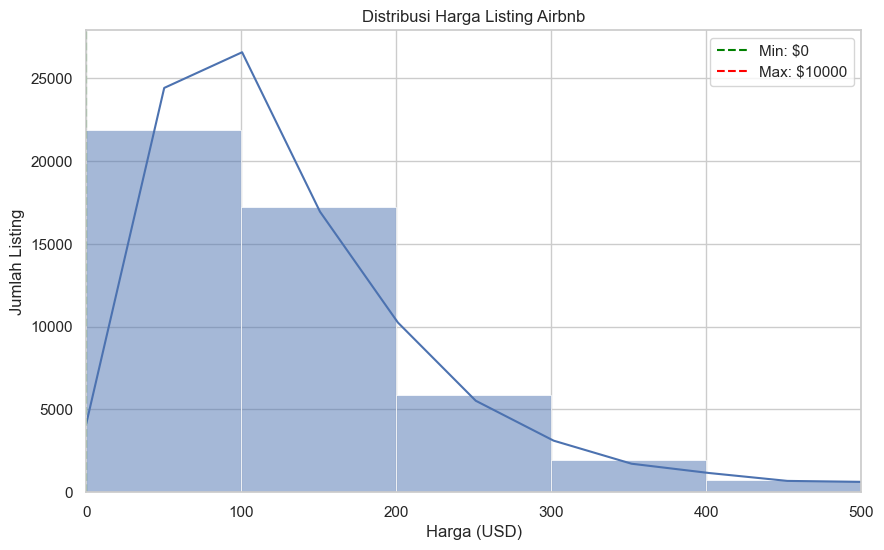

In [13]:
# Menampilkan harga terendah dan tertinggi
min_price = df_airbnb['price'].min()
max_price = df_airbnb['price'].max()

print(f"Harga Terendah: ${min_price}")
print(f"Harga Tertinggi: ${max_price}")

# Visualisasi distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['price'], bins=100, kde=True)
plt.xlim(0, 500)  # Batasi visualisasi sampai harga $500
plt.title("Distribusi Harga Listing Airbnb")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Listing")
plt.axvline(min_price, color='green', linestyle='--',
            label=f'Min: ${min_price}')
plt.axvline(max_price, color='red', linestyle='--',
            label=f'Max: ${max_price}')
plt.legend()
plt.show()

### Distribusi Reviews per month

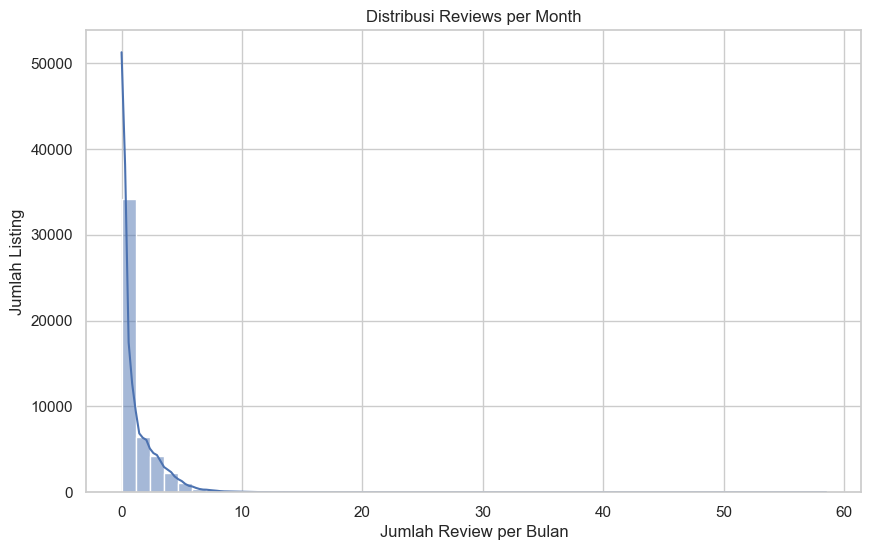

In [14]:
# 2. Distribusi Reviews per Month
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['reviews_per_month'], bins=50, kde=True)
plt.title("Distribusi Reviews per Month")
plt.xlabel("Jumlah Review per Bulan")
plt.ylabel("Jumlah Listing")
plt.show()

### Rata-rata harga per room_type

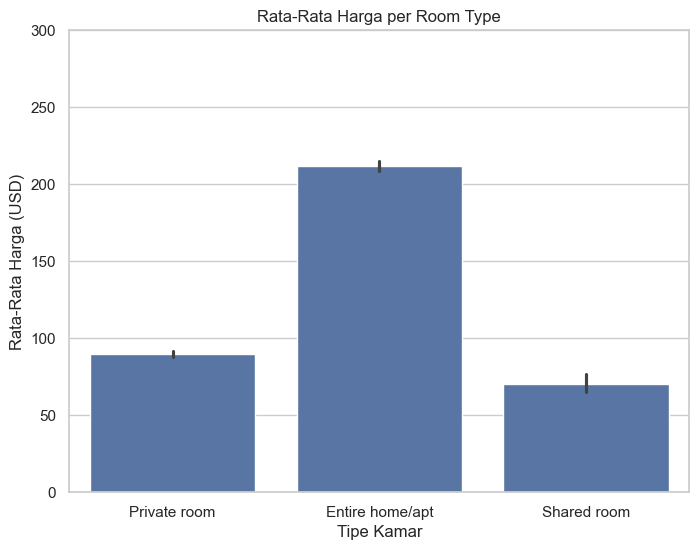

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_airbnb, x='room_type', y='price', estimator=np.mean)
plt.title("Rata-Rata Harga per Room Type")
plt.ylabel("Rata-Rata Harga (USD)")
plt.xlabel("Tipe Kamar")
plt.ylim(0, 300)
plt.show()

### Jumlah listing per neighbourhood group

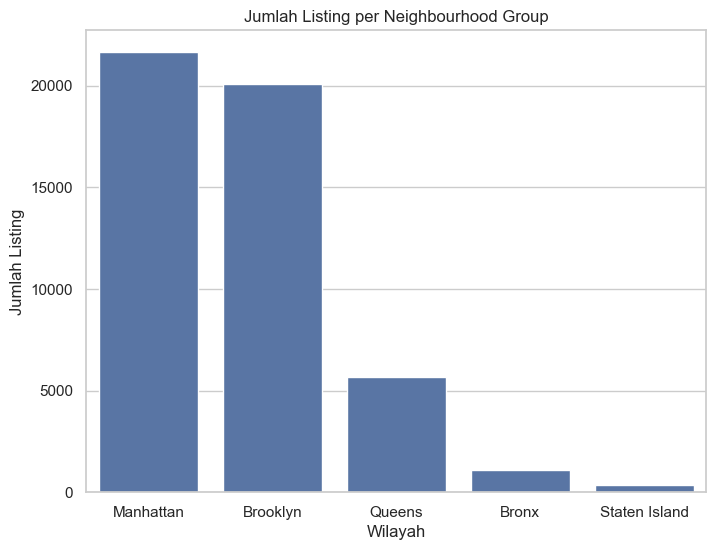

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_airbnb, x='neighbourhood_group',
              order=df_airbnb['neighbourhood_group'].value_counts().index)
plt.title("Jumlah Listing per Neighbourhood Group")
plt.ylabel("Jumlah Listing")
plt.xlabel("Wilayah")
plt.show()

### Scatter Jumlah review vs harga

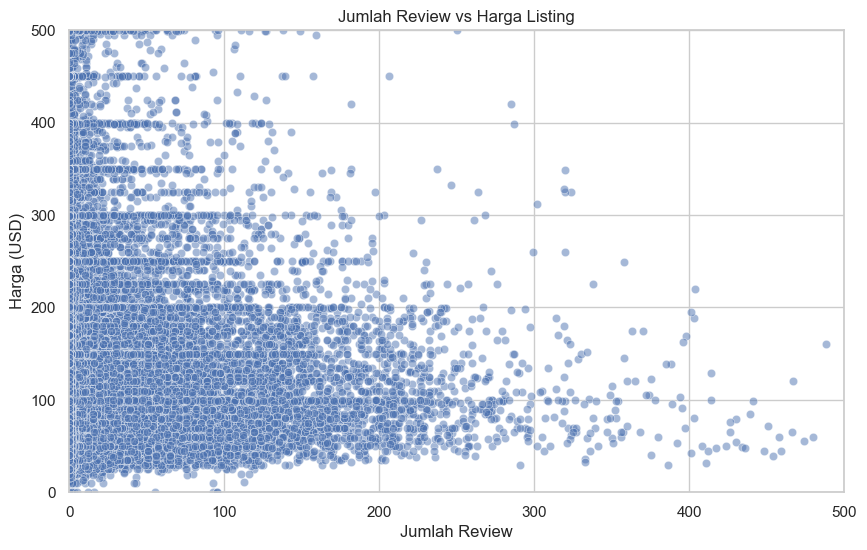

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='number_of_reviews', y='price', alpha=0.5)
plt.ylim(0, 500)
plt.xlim(0, 500)
plt.title("Jumlah Review vs Harga Listing")
plt.xlabel("Jumlah Review")
plt.ylabel("Harga (USD)")
plt.show()

### Peta Persebarang Listing

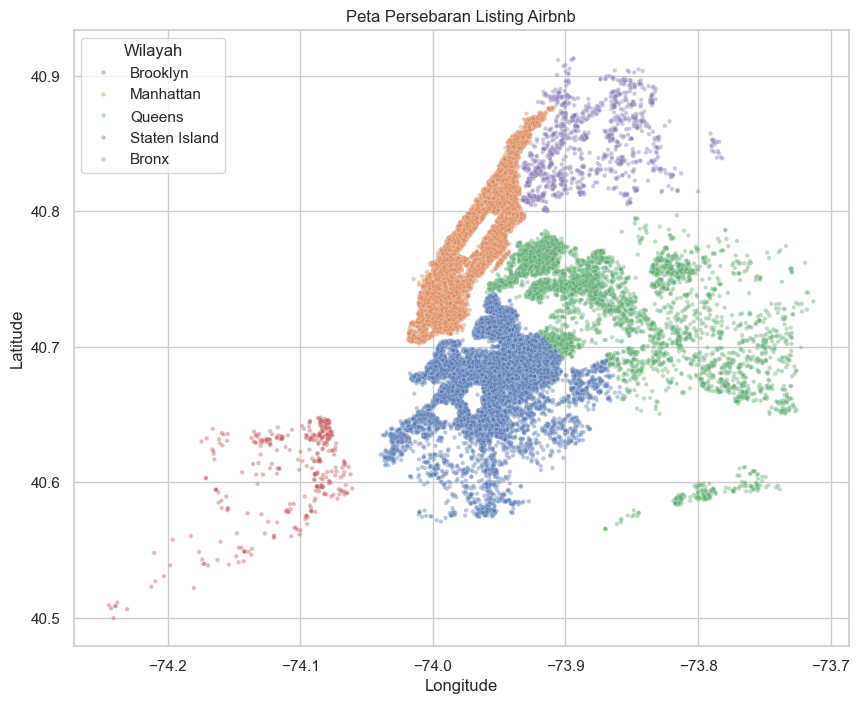

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_airbnb, x='longitude', y='latitude',
                hue='neighbourhood_group', alpha=0.4, s=10)
plt.title("Peta Persebaran Listing Airbnb")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Wilayah')
plt.show()

### Rata-rata harga per kombinasi lokasi dan tipe kamar

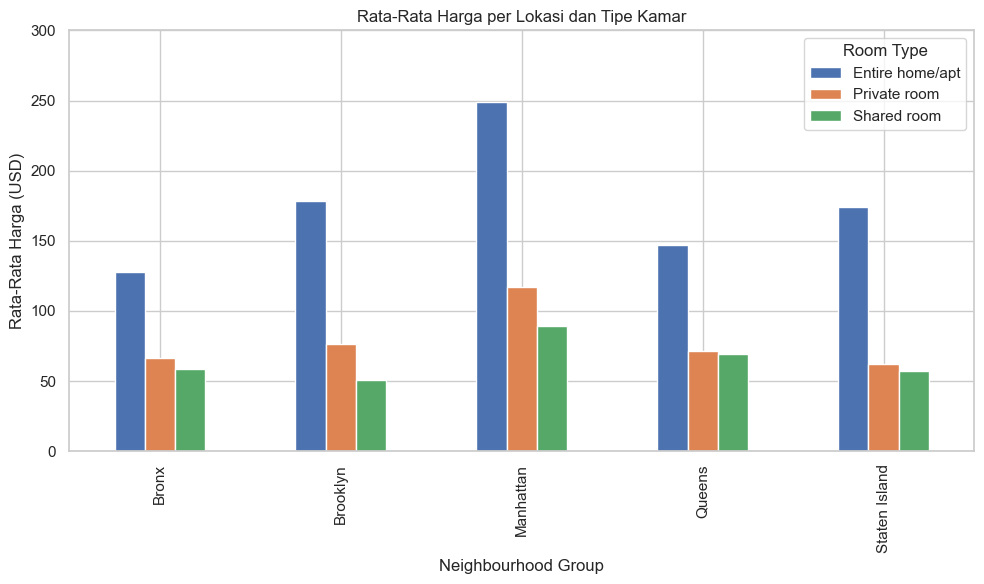

In [19]:
grouped_stats = df_airbnb.groupby(['neighbourhood_group', 'room_type'])[
    'price'].mean().unstack()
grouped_stats.plot(kind='bar', figsize=(10, 6))
plt.title("Rata-Rata Harga per Lokasi dan Tipe Kamar")
plt.ylabel("Rata-Rata Harga (USD)")
plt.xlabel("Neighbourhood Group")
plt.legend(title="Room Type")
plt.ylim(0, 300)
plt.tight_layout()
plt.show()

### Boxplot Harga per Wilayah

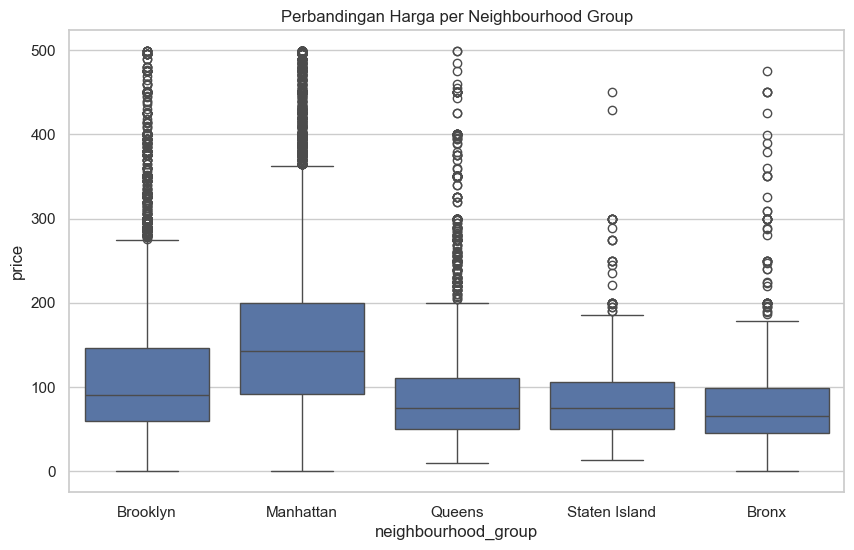

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_airbnb[df_airbnb['price'] < 500], x='neighbourhood_group', y='price')
plt.title("Perbandingan Harga per Neighbourhood Group")
plt.show()

### 10 Neighbourhood Paling Banyak Listing

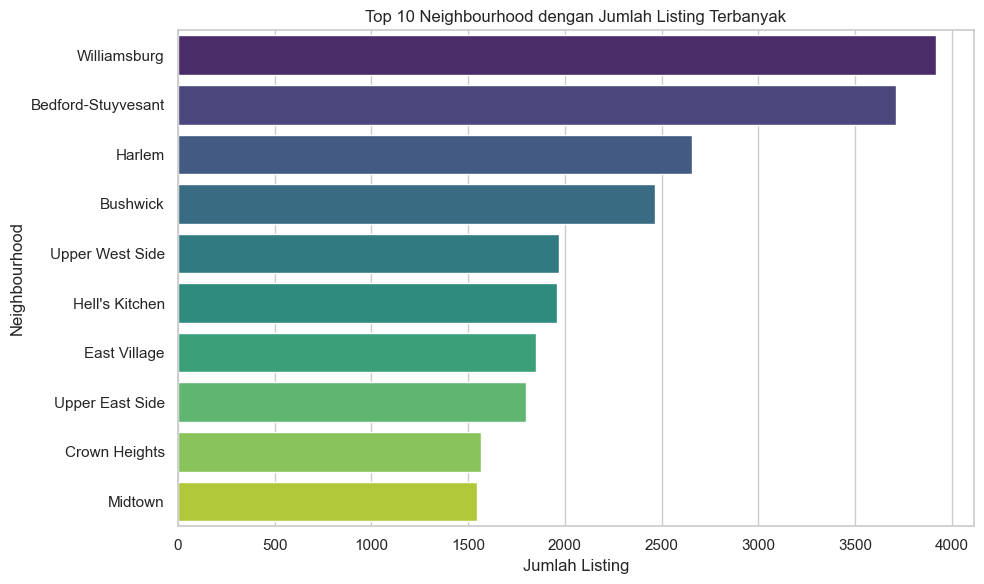

In [21]:
# Hitung jumlah listing per neighbourhood
top_neighbourhoods = df_airbnb['neighbourhood'].value_counts().head(10).reset_index()
top_neighbourhoods.columns = ['neighbourhood', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhoods, x='count', y='neighbourhood',
            palette='viridis', hue='neighbourhood', dodge=False, legend=False)
plt.title("Top 10 Neighbourhood dengan Jumlah Listing Terbanyak")
plt.xlabel("Jumlah Listing")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

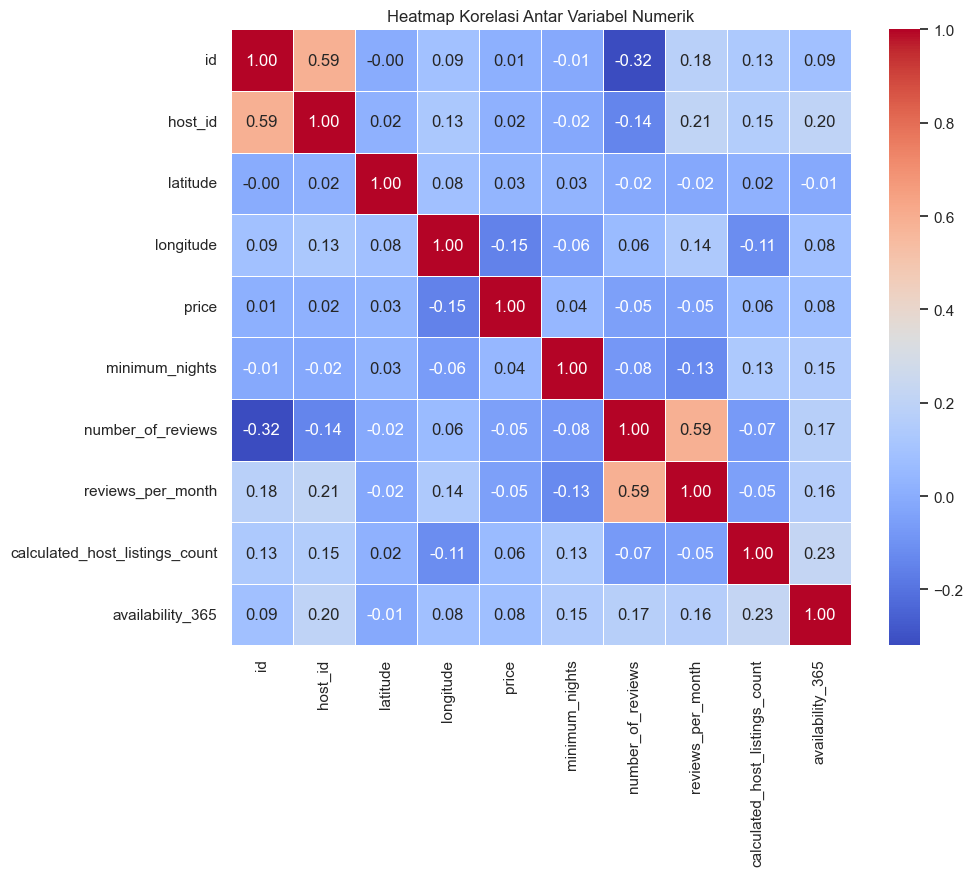

In [22]:
num_cols = df_airbnb.select_dtypes(include='number')

# Hitung korelasi
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

### Distribusi Mininum Nights

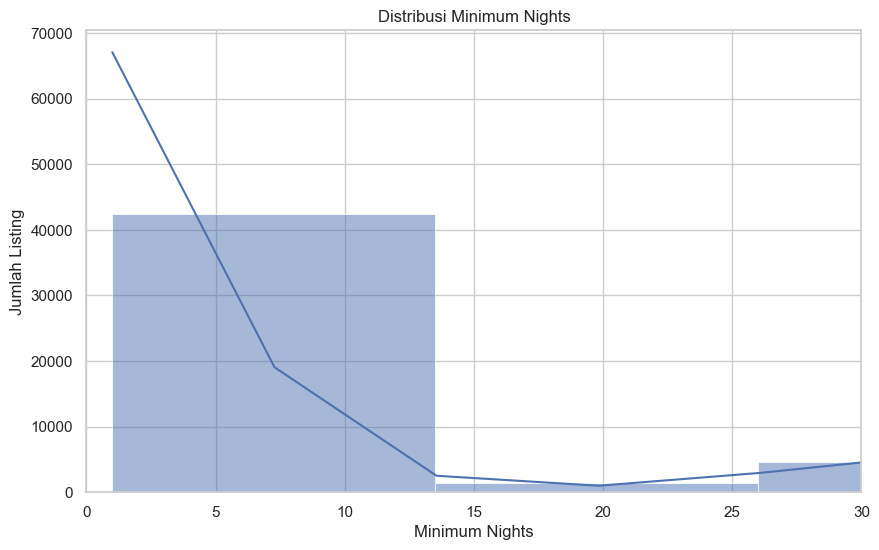

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['minimum_nights'], bins=100, kde=True)
plt.xlim(0, 30)
plt.title("Distribusi Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Jumlah Listing")
plt.show()

# Laporan Singkat: Hal Menarik dari Analisis Airbnb NYC 2019

## 1. Distribusi Harga
- Harga listing Airbnb sangat bervariasi.
- Banyak listing dengan harga di bawah \$200, namun ada outlier ekstrem di atas \$1000.
- Distribusi ini menunjukkan pasar yang dominan oleh **low-to-mid cost**.

## 2. Distribusi Reviews per Month
- Banyak listing tidak memiliki review bulanan.
- Listing yang aktif cenderung mendapatkan **1–5 review per bulan**, menunjukkan frekuensi penyewaan **rendah hingga sedang**.

## 3. Rata-Rata Harga per Tipe Kamar
- `Entire home/apt` memiliki harga rata-rata **paling tinggi**.
- `Shared room` dan `Private room` jauh lebih murah, cocok untuk **budget traveler**.

## 4. Jumlah Listing per Wilayah (Neighbourhood Group)
- **Manhattan** mendominasi dengan jumlah listing terbanyak, disusul **Brooklyn**.
- **Staten Island** memiliki sangat sedikit listing.

## 5. Hubungan antara Jumlah Review dan Harga (Scatter Plot)
- Tidak ada korelasi kuat antara harga dan jumlah review.
- Banyak listing murah yang mendapat banyak review → **menandakan popularitas**.

## 6. Peta Persebaran Listing
- Konsentrasi tertinggi berada di **Manhattan dan Brooklyn**.
- Wilayah populer seperti **Williamsburg**, **Midtown**, dan **Harlem** menonjol.

## 7. Rata-Rata Harga Berdasarkan Kombinasi Lokasi dan Tipe Kamar
- `Entire home/apt` di Manhattan menjadi kombinasi **paling mahal**.
- `Shared room` di Bronx/Staten Island merupakan **opsi termurah**.

## 8. Boxplot Harga per Wilayah
- **Manhattan** memiliki variasi harga tertinggi (dengan banyak outlier).
- Wilayah seperti **Bronx dan Queens** cenderung **lebih konsisten dan murah**.

## 9. 10 Neighbourhood dengan Listing Terbanyak
- **Williamsburg**, **Harlem**, dan **Bedford-Stuyvesant** adalah tiga kawasan dengan jumlah listing terbanyak.
- Menariknya, tidak semua dari Manhattan; **Brooklyn juga mendominasi**.

## 10. Distribusi Minimum Nights
- Mayoritas host menetapkan **minimum stay 1–3 malam**, mencerminkan dominasi **penginapan jangka pendek**.
- Jumlah listing menurun tajam setelah **5 malam minimum stay**.
- Ada sedikit lonjakan pada **minimum stay 30 malam**, menandakan keberadaan listing **bulanan atau jangka panjang**.
- Distribusi sangat **miring ke kanan (right-skewed)** dan **outlier ekstrim** perlu diperhatikan dalam analisis lanjut.
